In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# Visualization - Histograms


The table top consists of U.S.A.’s top grossing movies of all time. 
- Title: the title of the movie
- Studio: the studio that produced the movie. 
- Gross: the domestic box office gross in dollars
- Gross (Adjusted): the gross amount that would have been earned from ticket sales at 2016 prices. 
- Year: the release year of the movie.

In [3]:
top = pd.read_csv('top_movies_2017.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


## Numerical Distribution ##

In [4]:
#calculate the age of movies
ages = 2025 - top['Year']
top['Age']= ages
ages

0      86
1      48
2      60
3      43
4      28
       ..
195    45
196     9
197    32
198     9
199    37
Name: Year, Length: 200, dtype: int64

In [5]:
top

,Title,Studio,Gross,Gross (Adjusted),Year,Age
0,Gone with the Wind,MGM,198676459,1796176700,1939,86
1,Star Wars,Fox,460998007,1583483200,1977,48
2,The Sound of Music,Fox,158671368,1266072700,1965,60
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,43
4,Titanic,Paramount,658672302,1204368000,1997,28
...,...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980,45
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016,9
197,The Firm,Paramount,158348367,340028200,1993,32
198,Suicide Squad,Warner Brothers,325100054,339411900,2016,9


## Binning ##
Grouping the numerical data into contiguous intervals called bins

In [6]:
[np.min(ages), np.max(ages)]

[8, 104]

Define the bins. Bins include the data at their left endpoint, but not the data at their right endpoint.
[a, b) for the bin that starts at a and ends at b but doesn’t include b:

In [7]:
my_bins = np.array([0, 10, 15, 20, 30, 45, 70, 105])

In [8]:
#bins: [0,10), [10,15), [15,20), [20,30), [30,45), [45,70), [70,105) 
top['binned'] = pd.cut(top['Age'], bins = my_bins, right=False)
top

,Title,Studio,Gross,Gross (Adjusted),Year,Age,binned
0,Gone with the Wind,MGM,198676459,1796176700,1939,86,"[70, 105)"
1,Star Wars,Fox,460998007,1583483200,1977,48,"[45, 70)"
2,The Sound of Music,Fox,158671368,1266072700,1965,60,"[45, 70)"
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,43,"[30, 45)"
4,Titanic,Paramount,658672302,1204368000,1997,28,"[20, 30)"
...,...,...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980,45,"[45, 70)"
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016,9,"[0, 10)"
197,The Firm,Paramount,158348367,340028200,1993,32,"[30, 45)"
198,Suicide Squad,Warner Brothers,325100054,339411900,2016,9,"[0, 10)"


In [9]:
top.groupby('binned').size()

binned
[0, 10)      12
[10, 15)     18
[15, 20)     17
[20, 30)     41
[30, 45)     42
[45, 70)     52
[70, 105)    18
dtype: int64

In [10]:
#bins: [0,25), [25,50), [50,75), [75,100) 
top.groupby(pd.cut(top['Age'], bins = np.arange(0, 101, 25), right=False)).size()

Age
[0, 25)      72
[25, 50)     69
[50, 75)     48
[75, 100)    10
dtype: int64

In [11]:
#bins: [0,25), [25,50) 
top.groupby(pd.cut(top['Age'], bins = np.arange(0, 60, 25), right=False)).size()

Age
[0, 25)     72
[25, 50)    69
dtype: int64

In [12]:
#bins: 5 equal sized bins
top.groupby(pd.cut(top['Age'], bins = 5, right=False)).size()

Age
[8.0, 27.2)        81
[27.2, 46.4)       52
[46.4, 65.6)       44
[65.6, 84.8)       19
[84.8, 104.096)     4
dtype: int64

## Histograms ##

Histogram (hist) is the chart that displays the distribution of a numerical variable.

Uses bins: there is one bar corresponding to each bin

The area of each bar is propotional to the percent of entities in the corresponding bin



In [13]:
my_bins

array([  0,  10,  15,  20,  30,  45,  70, 105])

In [14]:
top.groupby('binned').size()

binned
[0, 10)      12
[10, 15)     18
[15, 20)     17
[20, 30)     41
[30, 45)     42
[45, 70)     52
[70, 105)    18
dtype: int64

In [15]:
sum(top.groupby('binned').size())

200

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

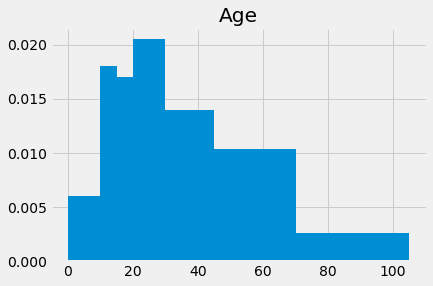

In [16]:
top.hist('Age', bins = my_bins, density=True)

<AxesSubplot:ylabel='Frequency'>

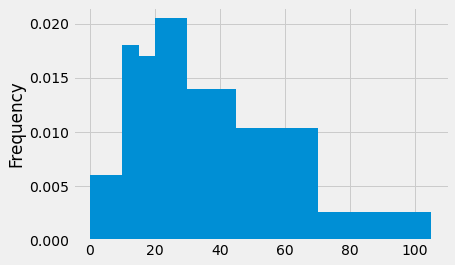

In [17]:
top['Age'].plot.hist(bins = my_bins, density=True)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

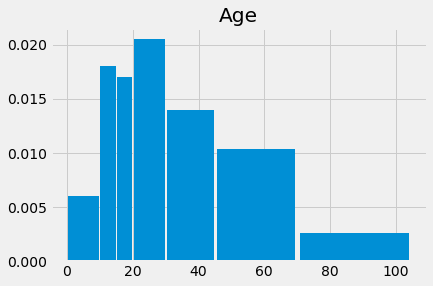

In [18]:
top.hist('Age', bins = my_bins, grid=True, density=True, rwidth=0.95)

Following chart is NOT an histogram. Height of each bar is propotional to the number of entities in each bin. But, since the bin sizes are not same, areas of bars are not propotional to the number (percentage) of entities in each bin

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

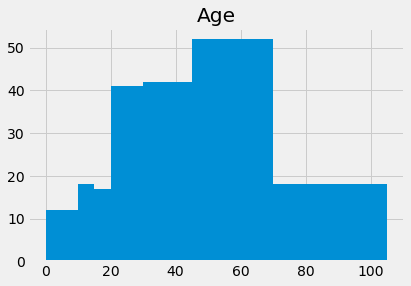

In [19]:
# What *not* to do. 
top.hist('Age', bins = my_bins)

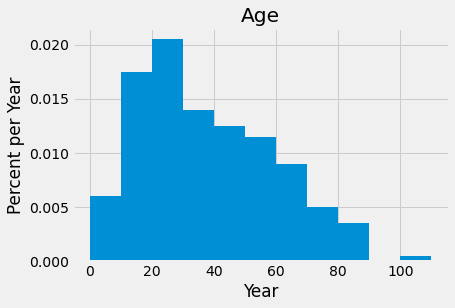

In [20]:
top.hist('Age', bins = np.arange(0, 120, 10), density=True)
plt.xlabel("Year")
plt.ylabel("Percent per Year")
plt.show()

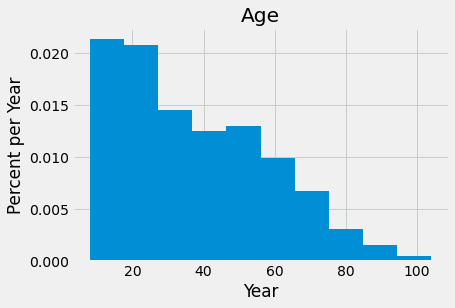

In [21]:
top.hist('Age', density=True)
plt.xlabel("Year")
plt.ylabel("Percent per Year")
plt.show()

In [22]:
my_bins

array([  0,  10,  15,  20,  30,  45,  70, 105])

In [23]:
top.groupby('binned').size()

binned
[0, 10)      12
[10, 15)     18
[15, 20)     17
[20, 30)     41
[30, 45)     42
[45, 70)     52
[70, 105)    18
dtype: int64

In [24]:
sum(top.groupby('binned').size())

200

In [25]:
# 51 out of 200 movies in the [45, 70) bin

percent = (52/200) * 100
percent

26.0

In [26]:
width = 70 - 45
width

25

In [27]:
height = percent / width
height

1.04

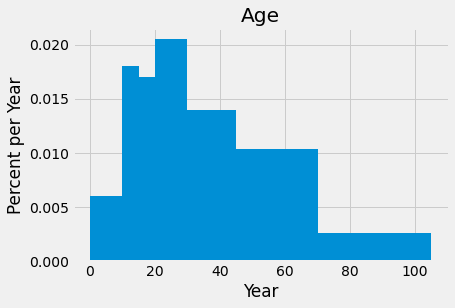

In [28]:
top.hist('Age', bins = my_bins, density=True)
plt.xlabel("Year")
plt.ylabel("Percent per Year")
plt.show()

#### Let's create the histogram of adjusted gross. ####
First divide the  Gross(Adjusted) by 1,000,000 so the values are in million dollars and add these values under 'Adjusted Gross' column : 

In [29]:
top

,Title,Studio,Gross,Gross (Adjusted),Year,Age,binned
0,Gone with the Wind,MGM,198676459,1796176700,1939,86,"[70, 105)"
1,Star Wars,Fox,460998007,1583483200,1977,48,"[45, 70)"
2,The Sound of Music,Fox,158671368,1266072700,1965,60,"[45, 70)"
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,43,"[30, 45)"
4,Titanic,Paramount,658672302,1204368000,1997,28,"[20, 30)"
...,...,...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980,45,"[45, 70)"
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016,9,"[0, 10)"
197,The Firm,Paramount,158348367,340028200,1993,32,"[30, 45)"
198,Suicide Squad,Warner Brothers,325100054,339411900,2016,9,"[0, 10)"


In [30]:
millions = top[["Title"]]
millions['Adjusted Gross']= np.round(top["Gross (Adjusted)"]/1000000, 2)
millions

,Title,Adjusted Gross
0,Gone with the Wind,1796.18
1,Star Wars,1583.48
2,The Sound of Music,1266.07
3,E.T.: The Extra-Terrestrial,1261.08
4,Titanic,1204.37
...,...,...
195,9 to 5,341.36
196,Batman v Superman: Dawn of Justice,340.14
197,The Firm,340.03
198,Suicide Squad,339.41


In [31]:
[min(millions['Adjusted Gross']), max(millions['Adjusted Gross'])]

[338.41, 1796.18]

In [32]:
bin_counts=millions.groupby(pd.cut(millions['Adjusted Gross'], bins = np.arange(300,2001,100), right=False)).size()
bin_counts

Adjusted Gross
[300, 400)      68
[400, 500)      60
[500, 600)      32
[600, 700)      15
[700, 800)       7
[800, 900)       7
[900, 1000)      3
[1000, 1100)     0
[1100, 1200)     3
[1200, 1300)     3
[1300, 1400)     0
[1400, 1500)     0
[1500, 1600)     1
[1600, 1700)     0
[1700, 1800)     1
[1800, 1900)     0
[1900, 2000)     0
dtype: int64

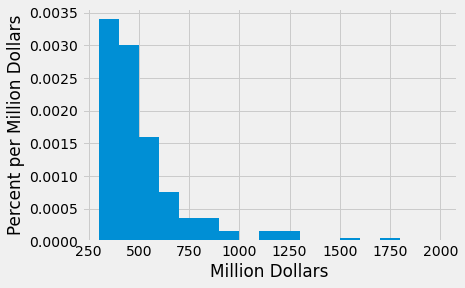

In [33]:
millions['Adjusted Gross'].plot.hist(bins=np.arange(300,2001,100), density=True)
plt.xlabel("Million Dollars")
plt.ylabel("Percent per Million Dollars")
plt.show()

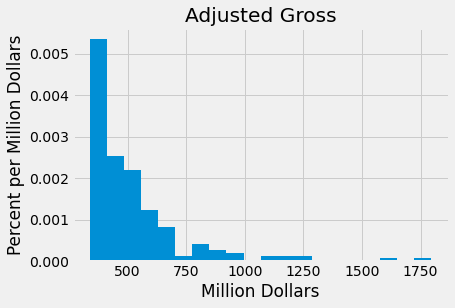

In [34]:
millions.hist('Adjusted Gross', bins=20, density=True)
plt.xlabel("Million Dollars")
plt.ylabel("Percent per Million Dollars")
plt.show()

##### Calculation: #####


Percentage of elements in each bin: Divide the number of elements in each bin by the total number of elements

Height of  bar= Percentage of elements in the corresponding bin / width of the bin

In [35]:
total=np.sum(bin_counts)
total

200

In [36]:
bin_width=100
percents= pd.DataFrame({'Count':bin_counts, 'Percent':(bin_counts/total)*100} )
percents['Height']= percents['Percent']/bin_width
percents

,Count,Percent,Height
Adjusted Gross,,,
"[300, 400)",68,34.0,0.340
"[400, 500)",60,30.0,0.300
"[500, 600)",32,16.0,0.160
"[600, 700)",15,7.5,0.075
"[700, 800)",7,3.5,0.035
"[800, 900)",7,3.5,0.035
"[900, 1000)",3,1.5,0.015
"[1000, 1100)",0,0.0,0.000
"[1100, 1200)",3,1.5,0.015


Uneven bin widths:

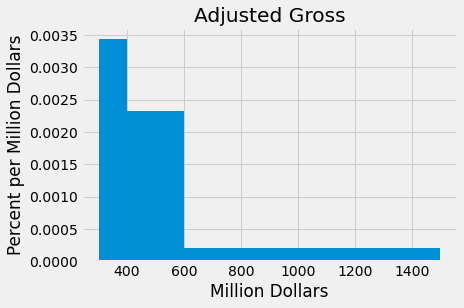

In [37]:
uneven = np.array([300, 400, 600, 1500])
millions.hist('Adjusted Gross', bins=uneven, density=True)
plt.xlabel("Million Dollars")
plt.ylabel("Percent per Million Dollars")
plt.show()

This is NOT a histogram:

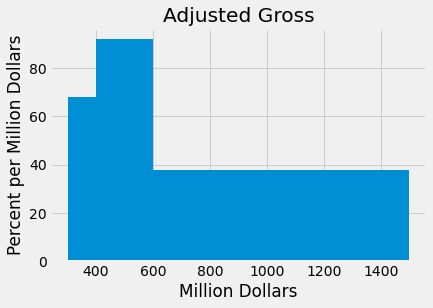

In [38]:
uneven = np.array([300, 400, 600, 1500])
millions.hist('Adjusted Gross', bins=uneven)
plt.xlabel("Million Dollars")
plt.ylabel("Percent per Million Dollars")
plt.show()

## Overlaid Graphs ##

Draw more than one plot in a single graphic on a common pair of axes.

In [40]:
# Heights of parents and their sons
heights = pd.read_csv('galton.csv')
heights=heights[heights['gender'] == 'male'][['father', 'mother', 'childHeight']].rename(columns={'childHeight':'son'})
heights

,father,mother,son
0,78.5,67.0,73.2
4,75.5,66.5,73.5
5,75.5,66.5,72.5
8,75.0,64.0,71.0
10,75.0,64.0,70.5
...,...,...,...
918,64.0,64.0,68.0
924,64.0,63.0,64.5
925,64.0,60.0,66.0
929,62.0,66.0,64.0


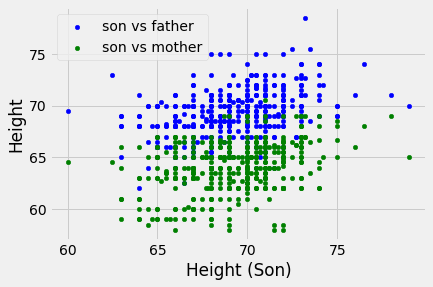

In [41]:
ax1= heights.plot.scatter(x='son',  y='father', color='b', label="son vs father", xlabel="Height (Son)", ylabel="Height")
heights.plot.scatter(x='son',  y='mother', color='g', label="son vs mother", xlabel="Height (Son)", ylabel="Height", ax=ax1)
plt.show()


In [42]:
# Read the full Census table
full = pd.read_csv('nc-est2014-agesex-res.csv')

# Select columns from the full table and relabel some of them
partial_census_table = full[['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014']]
us_pop = partial_census_table.rename(columns={'POPESTIMATE2010': '2010', 'POPESTIMATE2014': '2014'})

# Access the rows corresponding to all children, ages 0-18
children = us_pop[(us_pop['SEX'] == 0) & (us_pop['AGE'] < 19)].drop('SEX', axis=1)
children

,AGE,2010,2014
0,0,3951330,3948350
1,1,3957888,3962123
2,2,4090862,3957772
3,3,4111920,4005190
4,4,4077552,4003448
5,5,4064653,4004858
6,6,4073013,4134352
7,7,4043047,4154000
8,8,4025604,4119524
9,9,4125415,4106832


<AxesSubplot:xlabel='AGE'>

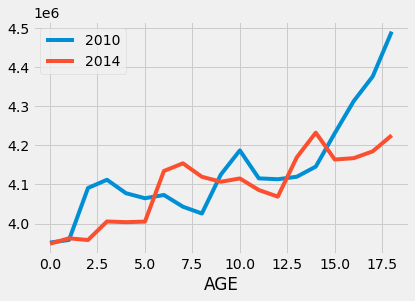

In [43]:
children.plot('AGE',['2010', '2014'] )

In [45]:
#Distribution of race and ethnicity in the U.S. and CA for all and children
usa_ca = pd.read_csv('us-ca-2014.csv')
usa_ca

,Ethnicity,USA All,CA All,USA Children,CA Children
0,Black,0.12,0.05,0.14,0.05
1,Hispanic,0.18,0.38,0.24,0.50
2,White,0.62,0.39,0.52,0.29
3,Other,0.08,0.18,0.10,0.16


<AxesSubplot:ylabel='Ethnicity'>

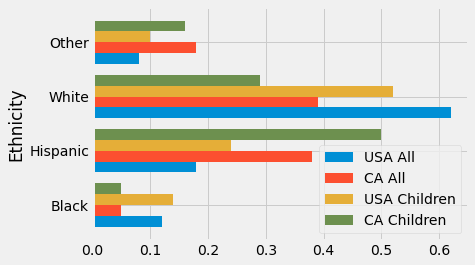

In [46]:
usa_ca.plot.barh('Ethnicity', width=0.8)

<AxesSubplot:ylabel='Ethnicity'>

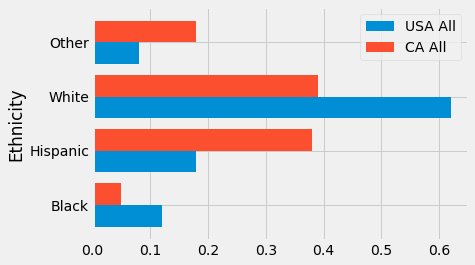

In [47]:
usa_ca.plot.barh('Ethnicity', ['USA All', 'CA All'], width=0.8)

<AxesSubplot:ylabel='Ethnicity'>

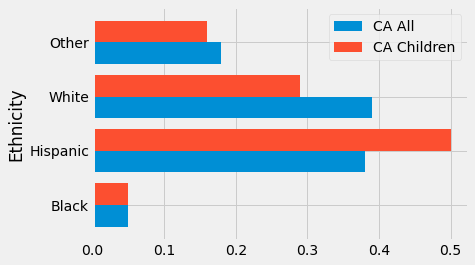

In [48]:
usa_ca.plot.barh('Ethnicity', ['CA All', 'CA Children'], width=0.8)


In [49]:
# Gross and Adjusted Gross for biggest box office hits of all time
boxoffice=top.iloc[:,[2,3]].rename(columns={"Gross (Adjusted)":"Adjusted Gross"})
boxoffice

,Gross,Adjusted Gross
0,198676459,1796176700
1,460998007,1583483200
2,158671368,1266072700
3,435110554,1261085000
4,658672302,1204368000
...,...,...
195,103290500,341357800
196,330360194,340137000
197,158348367,340028200
198,325100054,339411900


<AxesSubplot:ylabel='Frequency'>

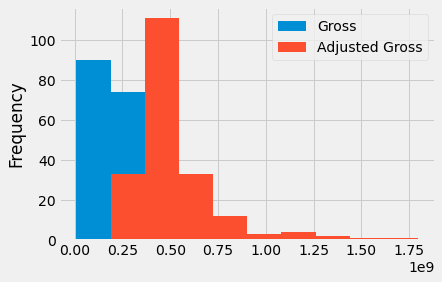

In [50]:
boxoffice.plot.hist(["Gross","Adjusted Gross"], bins=10)


In [51]:
# Parents'average heights (MidParent) and their child's height(Child)
heights = pd.read_csv('galton.csv').iloc[:,[3, 7]]
heights=heights.rename(columns={"midparentHeight":'MidParent', "childHeight":"Child"})
heights

,MidParent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


In [52]:
my_bins = np.arange(55, 80, 2)

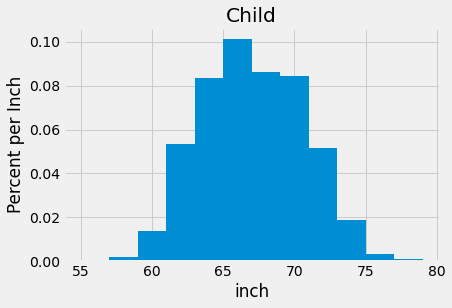

In [53]:
heights.hist('Child', bins = my_bins, density=True)
plt.xlabel("inch")
plt.ylabel("Percent per Inch")
plt.show()

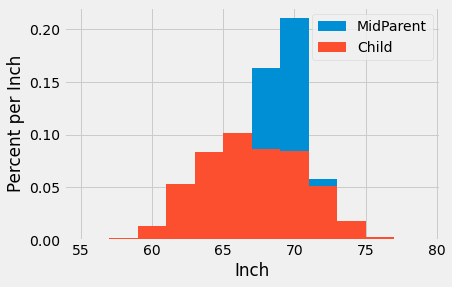

In [54]:
heights.plot.hist( ['Child','MidParent'], bins=my_bins, density=True)
plt.xlabel("Inch")
plt.ylabel("Percent per Inch")
plt.show()

In [55]:
incomes=pd.DataFrame( [61.7,
57.5,
40,
24.75,
24,
24,
20,
20,
15,
15,
15,
12,
10.5,
10.5,
10,
10,
8.5,
8,
6,
4.5], columns=['2016 Income (millions)'])

In [56]:
incomes

,2016 Income (millions)
0,61.70
1,57.50
2,40.00
3,24.75
4,24.00
5,24.00
6,20.00
7,20.00
8,15.00
9,15.00


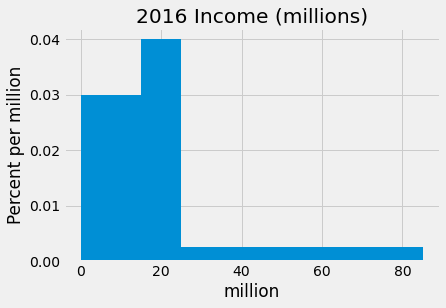

In [57]:
incomes.hist('2016 Income (millions)', bins=[0,15,25,85], density=True)
plt.xlabel("million")
plt.ylabel("Percent per million")
plt.show()